In [95]:
# Importando Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd #para geolocalización
from pandas_profiling import ProfileReport # infoHTML

In [104]:
# Leemos los datos seleccionados
df_main = pd.read_csv('../data/merged_data_cleaned.csv',index_col=0)

In [ ]:
df_main.info()

In [ ]:
df_main.head(10)

In [ ]:
df_main.columns

Generación de reporte HTML

In [ ]:
profile = ProfileReport(df_main, title='Pandas Profiling Report', explorative=True)

In [ ]:
profile.to_file('../data/reports/merged_data_cleaned.html')

In [97]:
%matplotlib inline

In [105]:
df_main['Species'].value_counts(), df_main['Species'].value_counts(normalize=True)

(Arabica    1311
 Robusta      28
 Name: Species, dtype: int64,
 Arabica    0.979089
 Robusta    0.020911
 Name: Species, dtype: float64)

In [106]:
#conteo_pais_x_especie = (df_main[['Country.of.Origin', 'Species']].dropna()) # Seleccion de columna y elimino NaNs
#conteo_pais_x_especie.head()

conteo_pais_x_especie = (df_main[['Country.of.Origin', 'Species']].dropna() # Seleccion de columna y elimino NaNs
                      .groupby(['Country.of.Origin', 'Species']).size() # Agrupo y cuento las obs. por intervalo de edad y sexo 
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
conteo_pais_x_especie.head()

,Country.of.Origin,Species,conteo
0,Brazil,Arabica,132
1,Burundi,Arabica,2
2,China,Arabica,16
3,Colombia,Arabica,183
4,Costa Rica,Arabica,51


<Figure size 1440x2160 with 0 Axes>

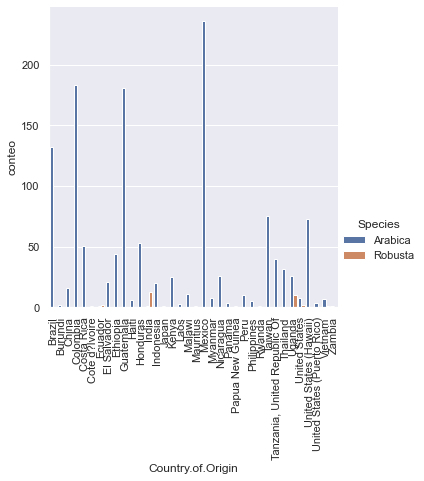

In [127]:
plt.figure(figsize=(20,30))
graf_pais_especie = sns.catplot(
    data=conteo_pais_x_especie, kind="bar",
    x="Country.of.Origin", y="conteo", hue="Species",
)
#sns.set(rc={'figure.figsize':(15,40)})
graf_pais_especie.set_xticklabels(rotation=90)

plt.show()